# Beta Distribution

In the lessons, you observed that the Beta distribution is a flexible distribution with the ability to enforce hard bounds on its random variable values. As a result, this distribution is a suitable candidate for modeling the distribution of random variables whose values are restricted to a specific range. To fit this distribution to observations, Bayesian estimation can be used to estimate the distribution parameters. In this exercise, we will avoid manual calculations and utilize R's built-in capabilities.

In the code below, you are given the scores for the Advanced Programming course. Now, we want to have a distribution for the exact values of these scores. What should we do? We know the range of scores is limited (in our dataset, these scores have been mapped to the range of zero to twenty). Therefore, fitting a Beta distribution to them might yield favorable results. In this exercise, we will examine this issue.

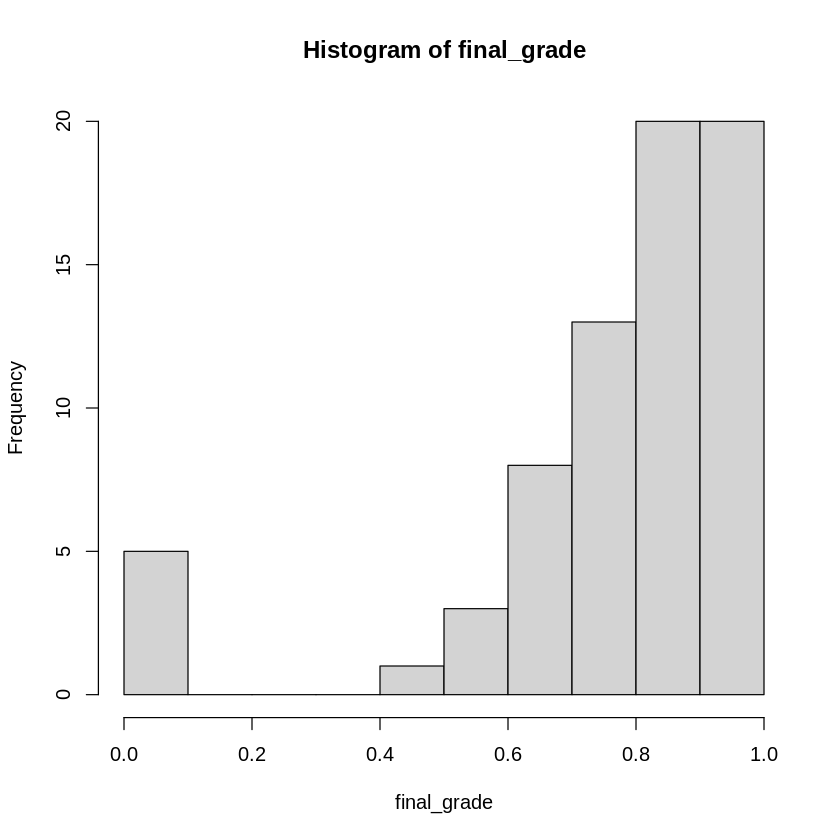

In [1]:
final_grade <- c(
       19.3, 18.2, 14.1, 15.1, 17.1, 0.0,
       16.2, 17.4, 16.1, 19.2, 14.6, 13.4,
       18.0, 15.7, 14.8, 17.0, 19.6, 18.2,
       0.0, 17.2, 0.0, 18.8, 16.7, 11.0,
       17.5, 19.3, 17.2, 13.5, 0.0, 18.5,
       16.8, 16.4, 12.8, 17.9, 19.4, 12.9,
       12.4, 19.1, 12.3, 18.0, 18.4, 18.5,
       15.2, 0.0, 12.9, 14.1, 17.5, 17.2,
       15.6, 14.9, 16.9, 12.0, 15.9, 18.4,
       17.8, 19.3, 12.0, 15.6, 13.7, 10.0,
       17.6, 19.1, 19.9, 18.2, 18.3, 17.7,
       19.0, 15.5, 15.1, 18.4
)

final_grade <- final_grade/20

hist(final_grade)

We observe that the zero values in the chart have distorted the natural shape. The reason for this is that the exam scores of absent students do not truly follow the distribution of exam scores. Therefore, it would be beneficial to remove these values from the dataset.

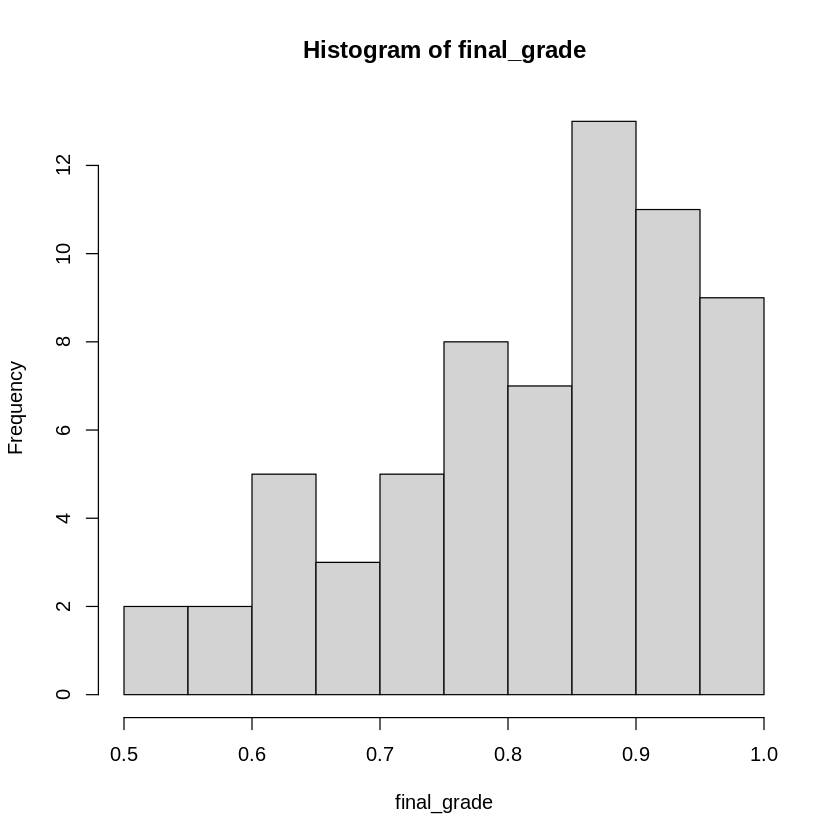

In [2]:
final_grade <- final_grade[final_grade > 0]

hist(final_grade)

In [ ]:
install.packages("EnvStats")
library(EnvStats)

In [4]:
# Estimate beta distribution parameters using `ebeta()` function which
# is defined in the EnvStats library.
beta_dist_estimation <- ebeta(final_grade)

a <- beta_dist_estimation$parameters["shape1"]
b <- beta_dist_estimation$parameters["shape2"]

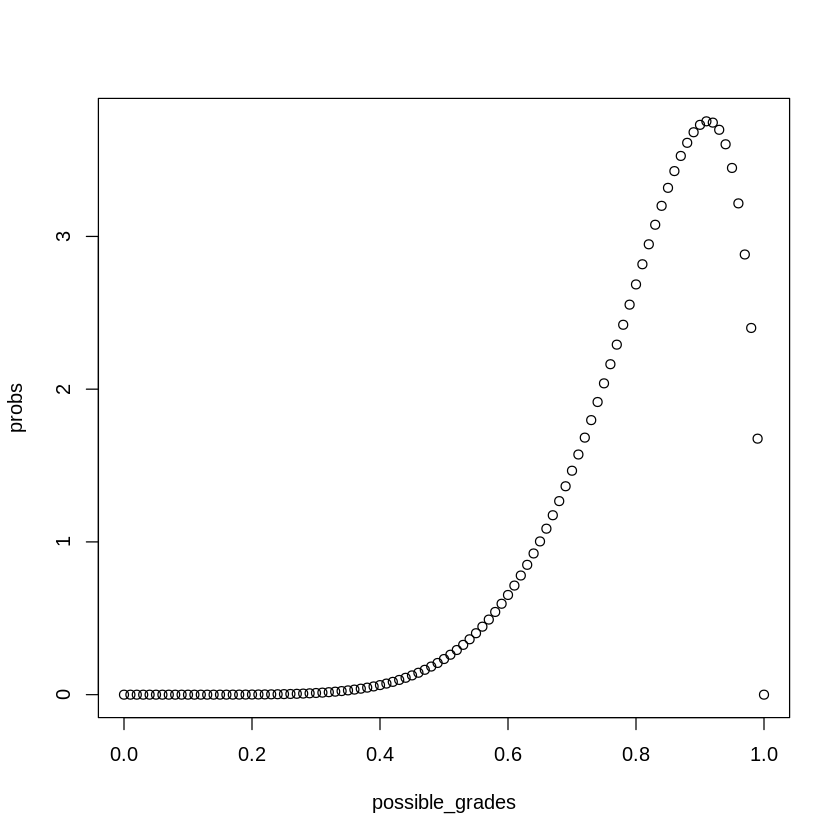

In [5]:
# Computing distribution density given the estimated parameters using `dbeta()`.
possible_grades <- seq(0, 1, by = 0.01)

probs <- dbeta(possible_grades, shape1 = a, shape2 = b)

plot(possible_grades, probs)

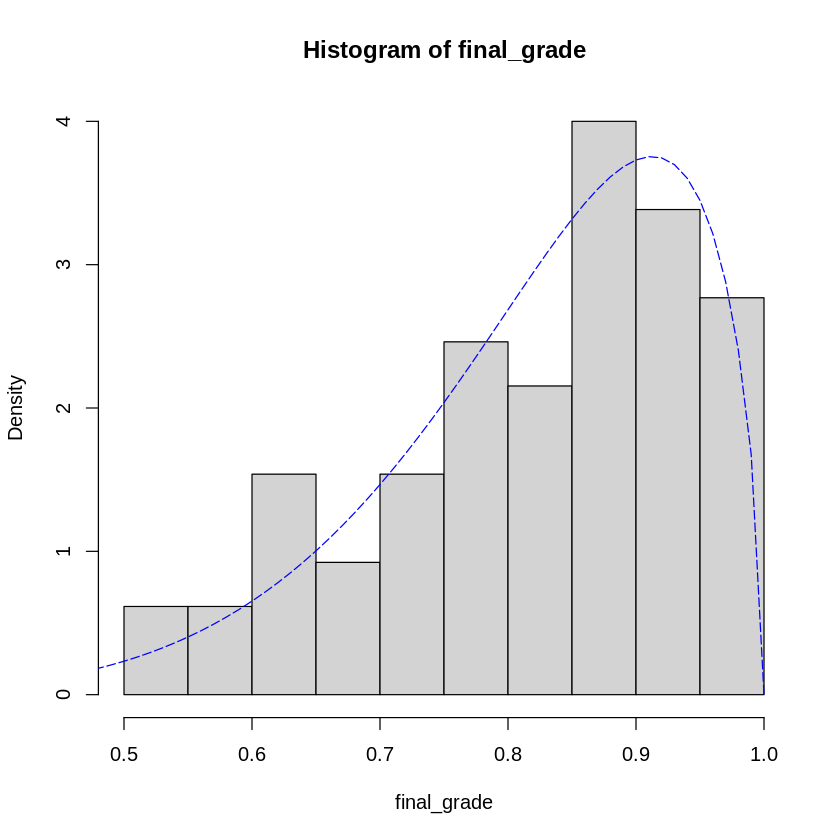

In [6]:
# Plot

hist(final_grade, freq = FALSE)
lines(possible_grades, probs, col = 'blue', lty=5)
legend(0.05, 1.75, legend=c("Observed", "Estimated Beta Distribution"),
       col=c("gray", "blue"), lty=c(1,5), cex=.8)

# Covariance and Correlation

As you know, covariance is actually a measure of how one variable changes in relation to another variable. In other words, covariance shows how two random variables change together.

You learned how to calculate covariance for two random variables from a specific population in the course. However, for calculating covariance on samples, covariance is computed as follows (where $n$ is the sample size):

$$cov(x, y) = \frac{Σ_{i=1}^n (x_i - x̄)(y_i - \bar y)}{n-1}$$

In [7]:
covariance <- function(x, y) {
  return (
    sum((x - mean(x)) * (y - mean(y))) / (length(x) - 1)
  )
}

In [8]:
x <- c(25, 27, 29)
y <- c(5, 15, 9)

covariance(x, y)

[1] 4

In [9]:
cov(x, y)

[1] 4

To calculate correlation on samples, covariance is computed as follows:
($s_x$ and $s_y$ represent the sample standard deviations of the random variables $x$ and $y$, respectively)

$$r_{xy}=\frac{cov(x, y)}{s_xs_y}$$

In [10]:
correlation <- function(x, y) {
  return (
    covariance(x, y) / (sd(x) * sd(y))
  )
}

In [11]:
x <- c(25, 27, 29)
y <- c(5, 15, 9)

correlation(x, y)

[1] 0.3973597

In [12]:
cor(x, y)

[1] 0.3973597